In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from os import listdir

In [ ]:
# folder = "prepared_stock_data"
# for i, stock in enumerate(listdir(folder)):
#     try:
#         if i == 0:
#             data = pd.read_csv(folder + "//" + stock)
#         else:
#             data = data.append(pd.read_csv(folder + "//" + stock))
#     except:
#         print(i)

In [ ]:
#data.to_csv("stocks_prepared_dataset.csv")

In [2]:
data = pd.read_csv("stocks_prepared_dataset.csv").drop(["Unnamed: 0","Name"],axis=1)

In [10]:
data.head(5)

,Unnamed: 0.1,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T23,T24,T25,T26,T27,T28,T29,T30,T31,Label
0,2009-12-16,1.250608,1.247874,1.109464,1.104664,1.635328,1.627841,1.720588,1.773613,1.794562,...,1.300995,1.111872,0.991389,0.631393,0.768642,0.216305,0.093381,0.089517,0.029494,NaN
1,2009-12-17,1.208991,1.072976,1.068259,1.589744,1.582386,1.673529,1.725637,1.746224,1.849530,...,1.208991,1.104167,0.938166,0.608850,0.607427,0.172903,0.095181,0.027119,-0.023631,NaN
2,2009-12-18,1.068415,1.063709,1.584046,1.576705,1.667647,1.719640,1.740181,1.843260,1.949593,...,1.119159,1.169856,0.837893,0.609583,0.587052,0.169568,0.079762,0.010022,-0.019459,NaN
3,2009-12-21,1.026166,1.537037,1.529830,1.619118,1.670165,1.690332,1.791536,1.895935,1.948675,...,1.058960,1.083041,0.719112,0.614687,0.515745,0.130794,0.099383,-0.004472,-0.020352,NaN
4,2009-12-22,1.508547,1.501420,1.589706,1.640180,1.660121,1.760188,1.863415,1.915563,1.949749,...,1.071765,0.969799,0.636617,0.587917,0.498723,0.125240,0.100625,0.022055,-0.029217,NaN


In [4]:
START = "2017-01-01"
MIDDLE = "2019-01-01"
END = "2020-01-01"
training_data = data[(data["Unnamed: 0.1"] >= START) & (data["Unnamed: 0.1"] < MIDDLE)]
testing_data = data[(data["Unnamed: 0.1"] >= MIDDLE) & (data["Unnamed: 0.1"] < END)]
print(training_data.shape, testing_data.shape)

(247620, 33) (124695, 33)


In [5]:
training_data = training_data.dropna()
testing_data = testing_data.dropna()
print(training_data.shape, testing_data.shape)

(247510, 33) (124522, 33)


In [9]:
training_data.head(5)

,Unnamed: 0.1,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T23,T24,T25,T26,T27,T28,T29,T30,T31,Label
1773,2017-01-03,0.478361,0.468195,0.439730,0.435294,0.450900,0.432646,0.457089,0.461161,0.423966,...,0.257732,0.077285,0.016667,-0.026448,0.038003,0.077693,0.055103,-0.013401,0.005061,False
1774,2017-01-04,0.473238,0.444675,0.440224,0.455884,0.437566,0.462094,0.466180,0.428857,0.430288,...,0.241752,0.083765,0.012604,-0.016677,0.028485,0.080895,0.072060,-0.010660,-0.004183,True
1775,2017-01-05,0.460185,0.455686,0.471514,0.453000,0.477791,0.481921,0.444197,0.445644,0.439557,...,0.268440,0.092132,0.027076,-0.009718,0.060875,0.102886,0.088016,-0.043651,0.014208,True
1776,2017-01-06,0.482577,0.498697,0.479841,0.505090,0.509296,0.470876,0.472349,0.466150,0.524863,...,0.277158,0.112447,0.050367,0.002424,0.087621,0.090804,0.150909,0.043986,0.029407,True
1777,2017-01-09,0.490429,0.471677,0.496787,0.500970,0.462761,0.464226,0.458061,0.516451,0.559585,...,0.287258,0.110089,0.024725,-0.007055,0.118107,0.089096,0.135571,0.024326,0.012854,False


In [7]:
def f(x):
    if x == False:
        return 0
    return 1
columns = ["T"+str(i) for i in range(1,32)]
Y_training = training_data['Label'].apply(lambda x: f(x))
Y_testing = testing_data['Label'].apply(lambda x: f(x))

In [8]:
class TrainingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(training_data[columns].values).float()
        self.y = torch.tensor(Y_training.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    
class TestingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(testing_data[columns].values).float()
        self.y = torch.tensor(Y_testing.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [12]:
class DNN_Model1(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out=2):
        super(DNN_Model1, self).__init__()
        self.drop1 = nn.Dropout(p = 0.1)
        self.drop2 = nn.Dropout(p = 0.5)
        self.channel1_l1 = nn.Linear(D_in, H1)
        self.channel1_l2 = nn.Linear(H1, H2)
        self.channel1_l3 = nn.Linear(H2, H3)
        
        self.channel2_l1 = nn.Linear(D_in, H1)
        self.channel2_l2 = nn.Linear(H1, H2)
        self.channel2_l3 = nn.Linear(H2, H3)
        
        self.out = nn.Linear(H3, D_out)

    def forward(self, x):
        x = torch.max(self.drop1(self.channel1_l1(x)), self.drop1(self.channel2_l1(x)))
        x = torch.max(self.drop2(self.channel1_l2(x)), self.drop2(self.channel2_l2(x)))
        x = torch.max(self.drop2(self.channel1_l3(x)), self.drop2(self.channel2_l3(x)))
        x = F.softmax(self.out(x))
        return x

In [13]:
class DNN_Carlos(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out=2):
        super(DNN_Carlos, self).__init__()
        self.drop1 = nn.Dropout(p = 0.5)
        self.drop2 = nn.Dropout(p = 0.25)
        
        self.linear1_1 = nn.Linear(D_in, H1)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear1_1.weight)
        self.linear2_1 = nn.Linear(H1, H2)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear2_1.weight)
        self.linear3_1 = nn.Linear(H2, H3)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear3_1.weight)
        self.linear1_2 = nn.Linear(D_in, H1)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear1_2.weight)
        self.linear2_2 = nn.Linear(H1, H2)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear2_2.weight)
        self.linear3_2 = nn.Linear(H2, H3)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear3_2.weight)
        
        self.bn1 = nn.BatchNorm1d(H1)
        self.bn2 = nn.BatchNorm1d(H2)
        self.bn3 = nn.BatchNorm1d(H3)
        
        self.out = nn.Linear(H3, D_out)

    def forward(self, x):
        x = torch.max(self.bn1(self.drop1(self.linear1_1(x))), self.bn1(self.drop1(self.linear1_2(x))))
        x = torch.max(self.bn2(self.drop2(self.linear2_1(x))), self.bn2(self.drop2(self.linear2_2(x))))
        x = torch.max(self.bn3(self.linear3_1(x)), self.bn3(self.linear3_2(x)))
        x = F.softmax(self.out(x))
        return x

In [14]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    training_info = {'training_loss':[], 'validation_accuracy': []}
    MIN = 9999
    COUNTER = 0
    temp = []
    for epoch in range(epochs):
        
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x)
            lambda1 = 0.00001
            all_params = torch.cat([b.view(-1) for b in model.parameters()])
            l1_regularization = lambda1 * torch.norm(all_params, 1)
            loss = criterion(y_hat,y) + l1_regularization
            loss.backward()
            optimizer.step()
            training_info['training_loss'].append(loss.data.item())
        
        if MIN == 9999 or loss.data.item() < MIN or epoch < 400:
            MIN = loss.data.item()
            COUNTER = 0
        else:
            COUNTER += 1
            
        correct = 0
        accuracy = 0
        for x, y in validation_loader:
            z = model(x)
            _, y_hat = torch.max(z,1)
            correct = (y_hat == y).sum().item()
            accuracy += correct/x.shape[0]
        training_info['validation_accuracy'].append(accuracy/len(validation_loader))
        
        if COUNTER == 5:
            print("FINISHED!!!")
            print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
            print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
            break
        
        print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
        print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
        
        

        
    return training_info

In [15]:
def trainMyModel(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    training_info = {'training_loss':[], 'validation_accuracy': []}
    MIN = 9999
    COUNTER = 0
    temp = []
    for epoch in range(epochs):
        
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x)
            loss = criterion(y_hat,y)
            loss.backward()
            optimizer.step()
            training_info['training_loss'].append(loss.data.item())
            
        correct = 0
        accuracy = 0
        for x, y in validation_loader:
            z = model(x)
            _, y_hat = torch.max(z,1)
            correct = (y_hat == y).sum().item()
            accuracy += correct/x.shape[0]
        training_info['validation_accuracy'].append(accuracy/len(validation_loader))
        
        print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
        print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
        
    return training_info

In [16]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

model1 = DNN_Model1(input_dim, hidden1, hidden2, hidden3, out_dim)
#model1.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model1.parameters())

In [17]:
training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [18]:
model1_trainingInfo = train(model1, criterion, train_loader, validation_loader, optimizer, 500)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.6925956010818481 ACCURCY: 0.51641281910659
current epoch 1 ,  0.2 % completed
LOSS: 0.6956472992897034 ACCURCY: 0.5236787793011941
current epoch 2 ,  0.4 % completed
LOSS: 0.691001296043396 ACCURCY: 0.5300445643520567
current epoch 3 ,  0.6 % completed
LOSS: 0.691961407661438 ACCURCY: 0.5401290614772225
current epoch 4 ,  0.8 % completed
LOSS: 0.685344934463501 ACCURCY: 0.5516864042459089
current epoch 5 ,  1.0 % completed
LOSS: 0.6802899837493896 ACCURCY: 0.5639651163202122
current epoch 6 ,  1.2 % completed
LOSS: 0.6771292090415955 ACCURCY: 0.589405841662981
current epoch 7 ,  1.4 % completed
LOSS: 0.6833484768867493 ACCURCY: 0.639309668288368
current epoch 8 ,  1.6 % completed
LOSS: 0.6381010413169861 ACCURCY: 0.6609020716497125
current epoch 9 ,  1.8 % completed
LOSS: 0.6383658051490784 ACCURCY: 0.6198242052189296
current epoch 10 ,  2.0 % completed
LOSS: 0.6401045918464661 ACCURCY: 0.6388366351172049
current epoch 11 ,  2.2 % completed
LOSS: 0.6321401000022888 ACCURCY: 0.6

LOSS: 0.5869458913803101 ACCURCY: 0.6858161662980978
current epoch 93 ,  18.6 % completed
LOSS: 0.6006065011024475 ACCURCY: 0.6826261795665635
current epoch 94 ,  18.8 % completed
LOSS: 0.6030330657958984 ACCURCY: 0.6854393206545778
current epoch 95 ,  19.0 % completed
LOSS: 0.5995429754257202 ACCURCY: 0.686270475011057
current epoch 96 ,  19.2 % completed
LOSS: 0.6075077652931213 ACCURCY: 0.6820417903582485
current epoch 97 ,  19.4 % completed
LOSS: 0.5984312295913696 ACCURCY: 0.6818073206545777
current epoch 98 ,  19.6 % completed
LOSS: 0.6189706921577454 ACCURCY: 0.6842148642193719
current epoch 99 ,  19.8 % completed
LOSS: 0.5864501595497131 ACCURCY: 0.6841416293675365
current epoch 100 ,  20.0 % completed
LOSS: 0.5896294116973877 ACCURCY: 0.6854898575851394
current epoch 101 ,  20.2 % completed
LOSS: 0.6081750392913818 ACCURCY: 0.6851534011499338
current epoch 102 ,  20.4 % completed
LOSS: 0.5884372591972351 ACCURCY: 0.6808779513489606
current epoch 103 ,  20.6 % completed
LOSS: 0

LOSS: 0.6138305068016052 ACCURCY: 0.6809545687748781
current epoch 184 ,  36.8 % completed
LOSS: 0.5963548421859741 ACCURCY: 0.6848948642193718
current epoch 185 ,  37.0 % completed
LOSS: 0.5997931361198425 ACCURCY: 0.6861576293675369
current epoch 186 ,  37.2 % completed
LOSS: 0.5926401019096375 ACCURCY: 0.6856418575851393
current epoch 187 ,  37.4 % completed
LOSS: 0.6005930304527283 ACCURCY: 0.6864077098628926
current epoch 188 ,  37.6 % completed
LOSS: 0.6115558743476868 ACCURCY: 0.6847277098628927
current epoch 189 ,  37.8 % completed
LOSS: 0.5967686772346497 ACCURCY: 0.6786270252100841
current epoch 190 ,  38.0 % completed
LOSS: 0.6000251173973083 ACCURCY: 0.6842000990712074
current epoch 191 ,  38.2 % completed
LOSS: 0.605358898639679 ACCURCY: 0.686972394515701
current epoch 192 ,  38.4 % completed
LOSS: 0.6141431927680969 ACCURCY: 0.6857593206545777
current epoch 193 ,  38.6 % completed
LOSS: 0.5935669541358948 ACCURCY: 0.6847685555064131
current epoch 194 ,  38.8 % completed
L

LOSS: 0.6072683334350586 ACCURCY: 0.686092005307386
current epoch 275 ,  55.0 % completed
LOSS: 0.6006143093109131 ACCURCY: 0.6817925555064133
current epoch 276 ,  55.2 % completed
LOSS: 0.592300295829773 ACCURCY: 0.6865450119416188
current epoch 277 ,  55.4 % completed
LOSS: 0.600728452205658 ACCURCY: 0.6803061795665636
current epoch 278 ,  55.6 % completed
LOSS: 0.5975968837738037 ACCURCY: 0.6852014011499337
current epoch 279 ,  55.8 % completed
LOSS: 0.5859712958335876 ACCURCY: 0.6857441662980983
current epoch 280 ,  56.0 % completed
LOSS: 0.5803231596946716 ACCURCY: 0.6862840053073862
current epoch 281 ,  56.2 % completed
LOSS: 0.5984371900558472 ACCURCY: 0.6846503140203449
current epoch 282 ,  56.4 % completed
LOSS: 0.5967857837677002 ACCURCY: 0.6866608509509067
current epoch 283 ,  56.6 % completed
LOSS: 0.6015993356704712 ACCURCY: 0.6846090119416188
current epoch 284 ,  56.8 % completed
LOSS: 0.6017032861709595 ACCURCY: 0.6856183140203451
current epoch 285 ,  57.0 % completed
LO

LOSS: 0.6044137477874756 ACCURCY: 0.68491392481203
current epoch 366 ,  73.2 % completed
LOSS: 0.5969489216804504 ACCURCY: 0.6856401662980983
current epoch 367 ,  73.4 % completed
LOSS: 0.595675528049469 ACCURCY: 0.686348783724016
current epoch 368 ,  73.6 % completed
LOSS: 0.5973919630050659 ACCURCY: 0.6855399380804954
current epoch 369 ,  73.8 % completed
LOSS: 0.5921057462692261 ACCURCY: 0.6866544750110571
current epoch 370 ,  74.0 % completed
LOSS: 0.5945190787315369 ACCURCY: 0.6867959380804954
current epoch 371 ,  74.2 % completed
LOSS: 0.6005268096923828 ACCURCY: 0.6863210119416189
current epoch 372 ,  74.4 % completed
LOSS: 0.5902737379074097 ACCURCY: 0.6870940858027421
current epoch 373 ,  74.6 % completed
LOSS: 0.5941978096961975 ACCURCY: 0.6853925555064133
current epoch 374 ,  74.8 % completed
LOSS: 0.5956014394760132 ACCURCY: 0.6849374011499337
current epoch 375 ,  75.0 % completed
LOSS: 0.6080795526504517 ACCURCY: 0.686476394515701
current epoch 376 ,  75.2 % completed
LOSS

# 2019 trading data

## Paper's model

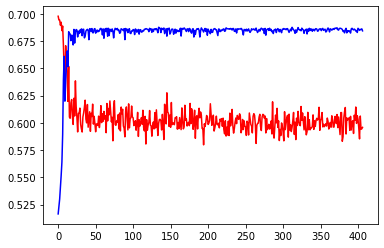

In [19]:
steps = int(len(model1_trainingInfo["training_loss"])/len(model1_trainingInfo["validation_accuracy"]))
plt.plot(model1_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model1_trainingInfo["validation_accuracy"], color = "blue")

In [20]:
path = "models//model1_2019.pth"

In [21]:
torch.save(model1.state_dict(), path)
model1.load_state_dict(torch.load(path))
model1.eval()

DNN_Model1(
  (drop1): Dropout(p=0.1, inplace=False)
  (drop2): Dropout(p=0.5, inplace=False)
  (channel1_l1): Linear(in_features=31, out_features=31, bias=True)
  (channel1_l2): Linear(in_features=31, out_features=10, bias=True)
  (channel1_l3): Linear(in_features=10, out_features=5, bias=True)
  (channel2_l1): Linear(in_features=31, out_features=31, bias=True)
  (channel2_l2): Linear(in_features=31, out_features=10, bias=True)
  (channel2_l3): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

## Carlos' model

In [ ]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

modelCarlos = DNN_Carlos(input_dim, hidden1, hidden2, hidden3, out_dim)
#model.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCarlos.parameters(), lr=1e-4)

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [ ]:
model_trainingInfo = trainMyModel(modelCarlos, criterion, train_loader, validation_loader, optimizer, 400)

In [ ]:
steps = int(len(model_trainingInfo["training_loss"])/len(model_trainingInfo["validation_accuracy"]))
plt.plot(model_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model_trainingInfo["validation_accuracy"], color = "blue")

In [ ]:
path = "models//modelCarlos_2019.pth"

In [ ]:
torch.save(modelCarlos.state_dict(), path)
modelCarlos.load_state_dict(torch.load(path))
modelCarlos.eval()

# 2018 trading data

In [22]:
START = "2016-01-01"
MIDDLE = "2018-01-01"
END = "2019-01-01"
training_data = data[(data["Unnamed: 0.1"] >= START) & (data["Unnamed: 0.1"] < MIDDLE)]
testing_data = data[(data["Unnamed: 0.1"] >= MIDDLE) & (data["Unnamed: 0.1"] < END)]
print(training_data.shape, testing_data.shape)

training_data = training_data.dropna()
testing_data = testing_data.dropna()
print(training_data.shape, testing_data.shape)

(246975, 33) (123972, 33)
(246899, 33) (123906, 33)


In [23]:
Y_training = training_data['Label'].apply(lambda x: f(x))
Y_testing = testing_data['Label'].apply(lambda x: f(x))

In [24]:
class TrainingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(training_data[columns].values).float()
        self.y = torch.tensor(Y_training.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    
class TestingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(testing_data[columns].values).float()
        self.y = torch.tensor(Y_testing.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [26]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

model1 = DNN_Model1(input_dim, hidden1, hidden2, hidden3, out_dim)
#model1.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model1.parameters())

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

## Paper's model

In [27]:
model1_trainingInfo = train(model1, criterion, train_loader, validation_loader, optimizer, 500)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.697980523109436 ACCURCY: 0.5145136098310291
current epoch 1 ,  0.2 % completed
LOSS: 0.69368577003479 ACCURCY: 0.5218086799795186
current epoch 2 ,  0.4 % completed
LOSS: 0.691882312297821 ACCURCY: 0.5272867875064006
current epoch 3 ,  0.6 % completed
LOSS: 0.6961421966552734 ACCURCY: 0.53517385765489
current epoch 4 ,  0.8 % completed
LOSS: 0.6924892067909241 ACCURCY: 0.5491489278033793
current epoch 5 ,  1.0 % completed
LOSS: 0.6819688677787781 ACCURCY: 0.5637185540194573
current epoch 6 ,  1.2 % completed
LOSS: 0.6845780611038208 ACCURCY: 0.5870482293906811
current epoch 7 ,  1.4 % completed
LOSS: 0.6614798903465271 ACCURCY: 0.6243712155657962
current epoch 8 ,  1.6 % completed
LOSS: 0.6525678634643555 ACCURCY: 0.6476160614439322
current epoch 9 ,  1.8 % completed
LOSS: 0.6632350087165833 ACCURCY: 0.6337936385048643
current epoch 10 ,  2.0 % completed
LOSS: 0.6345789432525635 ACCURCY: 0.623516841781874
current epoch 11 ,  2.2 % completed
LOSS: 0.6615710258483887 ACCURCY: 0.6

LOSS: 0.6038559079170227 ACCURCY: 0.6776347158218126
current epoch 94 ,  18.8 % completed
LOSS: 0.5926951169967651 ACCURCY: 0.6794488069636456
current epoch 95 ,  19.0 % completed
LOSS: 0.6013010740280151 ACCURCY: 0.6795972882744497
current epoch 96 ,  19.2 % completed
LOSS: 0.6059600710868835 ACCURCY: 0.6797351971326164
current epoch 97 ,  19.4 % completed
LOSS: 0.6008602380752563 ACCURCY: 0.6806478443420378
current epoch 98 ,  19.6 % completed
LOSS: 0.5876300930976868 ACCURCY: 0.6797793630312339
current epoch 99 ,  19.8 % completed
LOSS: 0.611396074295044 ACCURCY: 0.6793713630312339
current epoch 100 ,  20.0 % completed
LOSS: 0.5803301930427551 ACCURCY: 0.6769582345110088
current epoch 101 ,  20.2 % completed
LOSS: 0.5851761102676392 ACCURCY: 0.6788535873015873
current epoch 102 ,  20.4 % completed
LOSS: 0.5844557881355286 ACCURCY: 0.6744676620583718
current epoch 103 ,  20.6 % completed
LOSS: 0.600889265537262 ACCURCY: 0.679773935483871
current epoch 104 ,  20.8 % completed
LOSS: 0.

LOSS: 0.6045175194740295 ACCURCY: 0.6795825499231951
current epoch 185 ,  37.0 % completed
LOSS: 0.5969266295433044 ACCURCY: 0.6773691059907834
current epoch 186 ,  37.2 % completed
LOSS: 0.6117079854011536 ACCURCY: 0.6802568069636457
current epoch 187 ,  37.4 % completed
LOSS: 0.5873275995254517 ACCURCY: 0.6781729564772145
current epoch 188 ,  37.6 % completed
LOSS: 0.5975785255432129 ACCURCY: 0.6798068817204301
current epoch 189 ,  37.8 % completed
LOSS: 0.604917049407959 ACCURCY: 0.6794424004096261
current epoch 190 ,  38.0 % completed
LOSS: 0.602888286113739 ACCURCY: 0.6785879938556065
current epoch 191 ,  38.2 % completed
LOSS: 0.6009770631790161 ACCURCY: 0.679149603686636
current epoch 192 ,  38.4 % completed
LOSS: 0.5951805114746094 ACCURCY: 0.6807211223758319
current epoch 193 ,  38.6 % completed
LOSS: 0.587699830532074 ACCURCY: 0.6802936036866359
current epoch 194 ,  38.8 % completed
LOSS: 0.6127668023109436 ACCURCY: 0.675280790578597
current epoch 195 ,  39.0 % completed
LOSS

LOSS: 0.5976445078849792 ACCURCY: 0.6799736036866357
current epoch 276 ,  55.2 % completed
LOSS: 0.5971461534500122 ACCURCY: 0.6773099190988223
current epoch 277 ,  55.4 % completed
LOSS: 0.6015692353248596 ACCURCY: 0.6775969564772146
current epoch 278 ,  55.6 % completed
LOSS: 0.6014581918716431 ACCURCY: 0.6733006246799795
current epoch 279 ,  55.8 % completed
LOSS: 0.6174599528312683 ACCURCY: 0.677053271889401
current epoch 280 ,  56.0 % completed
LOSS: 0.6091575622558594 ACCURCY: 0.6788811059907834
current epoch 281 ,  56.2 % completed
LOSS: 0.6008443236351013 ACCURCY: 0.6765147158218126
current epoch 282 ,  56.4 % completed
LOSS: 0.5867465734481812 ACCURCY: 0.676179031233999
current epoch 283 ,  56.6 % completed
LOSS: 0.5818578600883484 ACCURCY: 0.6784683092677932
current epoch 284 ,  56.8 % completed
LOSS: 0.5893304347991943 ACCURCY: 0.679207844342038
current epoch 285 ,  57.0 % completed
LOSS: 0.5968725085258484 ACCURCY: 0.6750180686123913
current epoch 286 ,  57.2 % completed
LO

LOSS: 0.6352018117904663 ACCURCY: 0.6780577532002048
current epoch 367 ,  73.4 % completed
LOSS: 0.6056711077690125 ACCURCY: 0.6795326410650283
current epoch 368 ,  73.6 % completed
LOSS: 0.6171861290931702 ACCURCY: 0.6745050896057347
current epoch 369 ,  73.8 % completed
LOSS: 0.566402018070221 ACCURCY: 0.6747463840245775
current epoch 370 ,  74.0 % completed
LOSS: 0.6038865447044373 ACCURCY: 0.6782359938556068
current epoch 371 ,  74.2 % completed
LOSS: 0.6128408908843994 ACCURCY: 0.6804052882744496
current epoch 372 ,  74.4 % completed
LOSS: 0.5856325030326843 ACCURCY: 0.6793368069636457
current epoch 373 ,  74.6 % completed
LOSS: 0.6100407242774963 ACCURCY: 0.6783195125448028
current epoch 374 ,  74.8 % completed
LOSS: 0.6065163016319275 ACCURCY: 0.6740276620583718
current epoch 375 ,  75.0 % completed
LOSS: 0.5874571800231934 ACCURCY: 0.6768862345110087
current epoch 376 ,  75.2 % completed
LOSS: 0.6035345792770386 ACCURCY: 0.6794763256528418
current epoch 377 ,  75.4 % completed


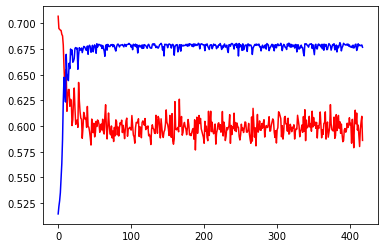

In [28]:
steps = int(len(model1_trainingInfo["training_loss"])/len(model1_trainingInfo["validation_accuracy"]))
plt.plot(model1_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model1_trainingInfo["validation_accuracy"], color = "blue")

In [29]:
path = "models//model1_2018.pth"
torch.save(model1.state_dict(), path)
model1.load_state_dict(torch.load(path))
model1.eval()

DNN_Model1(
  (drop1): Dropout(p=0.1, inplace=False)
  (drop2): Dropout(p=0.5, inplace=False)
  (channel1_l1): Linear(in_features=31, out_features=31, bias=True)
  (channel1_l2): Linear(in_features=31, out_features=10, bias=True)
  (channel1_l3): Linear(in_features=10, out_features=5, bias=True)
  (channel2_l1): Linear(in_features=31, out_features=31, bias=True)
  (channel2_l2): Linear(in_features=31, out_features=10, bias=True)
  (channel2_l3): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

## Carlos' model

In [ ]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

modelCarlos = DNN_Carlos(input_dim, hidden1, hidden2, hidden3, out_dim)
#model.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCarlos.parameters(), lr=1e-4)

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [ ]:
model_trainingInfo = trainMyModel(modelCarlos, criterion, train_loader, validation_loader, optimizer, 400)

In [ ]:
steps = int(len(model_trainingInfo["training_loss"])/len(model_trainingInfo["validation_accuracy"]))
plt.plot(model_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model_trainingInfo["validation_accuracy"], color = "blue")

In [ ]:
path = "models//modelCarlos_2018.pth"

In [ ]:
torch.save(modelCarlos.state_dict(), path)
modelCarlos.load_state_dict(torch.load(path))
modelCarlos.eval()